<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,29.698374,53.778632,37.409994,-0.202446,130.684554,130.845937,-0.161382
1,0.0,1.0,22.157266,65.301848,91.556964,0.257629,189.273708,189.004255,0.269453
2,0.0,2.0,57.348005,70.151917,47.660037,-0.141927,185.018033,185.136989,-0.118956
3,0.0,3.0,70.060369,52.512838,20.851870,-0.087002,153.338076,153.376561,-0.038485
4,0.0,4.0,88.251634,97.780836,54.201401,0.080414,250.314284,250.237981,0.076303
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.349929,51.320609,81.226659,0.119358,188.016556,187.878872,0.137684
119996,999.0,116.0,44.668089,55.344176,88.731618,0.137342,198.881225,198.730202,0.151024
119997,999.0,117.0,60.734316,48.103144,35.995997,-0.098629,154.734828,154.792986,-0.058158
119998,999.0,118.0,37.074269,53.581979,32.406543,-0.286889,132.775903,133.010688,-0.234785


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,29.698374,53.778632,37.409994,-0.202446,130.684554,130.845937,-0.161382
1,0.0,1.0,22.157266,65.301848,91.556964,0.257629,189.273708,189.004255,0.269453
2,0.0,2.0,57.348005,70.151917,47.660037,-0.141927,185.018033,185.136989,-0.118956
3,0.0,3.0,70.060369,52.512838,20.851870,-0.087002,153.338076,153.376561,-0.038485
4,0.0,4.0,88.251634,97.780836,54.201401,0.080414,250.314284,250.237981,0.076303
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.349929,51.320609,81.226659,0.119358,188.016556,187.878872,0.137684
119996,999.0,116.0,44.668089,55.344176,88.731618,0.137342,198.881225,198.730202,0.151024
119997,999.0,117.0,60.734316,48.103144,35.995997,-0.098629,154.734828,154.792986,-0.058158
119998,999.0,118.0,37.074269,53.581979,32.406543,-0.286889,132.775903,133.010688,-0.234785


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    29.698374  53.778632  37.409994  ...  130.684554  130.845937 -0.161382
      1.0    22.157266  65.301848  91.556964  ...  189.273708  189.004255  0.269453
      2.0    57.348005  70.151917  47.660037  ...  185.018033  185.136989 -0.118956
      3.0    70.060369  52.512838  20.851870  ...  153.338076  153.376561 -0.038485
      4.0    88.251634  97.780836  54.201401  ...  250.314284  250.237981  0.076303
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  45.349929  51.320609  81.226659  ...  188.016556  187.878872  0.137684
      116.0  44.668089  55.344176  88.731618  ...  198.881225  198.730202  0.151024
      117.0  60.734316  48.103144  35.995997  ...  154.734828  154.792986 -0.058158
      118.0  37.074269  53.581979  32.406543  ...  132.775903  133.010688 -0.234785
      119.0  32.025390  25.634646  71.259908  ...  139.028822  138.888441  0.140381

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    29.698374  53.778632  37.409994  ...  130.684554  130.845937 -0.161382
      1.0    22.157266  65.301848  91.556964  ...  189.273708  189.004255  0.269453
      2.0    57.348005  70.151917  47.660037  ...  185.018033  185.136989 -0.118956
      3.0    70.060369  52.512838  20.851870  ...  153.338076  153.376561 -0.038485
      4.0    88.251634  97.780836  54.201401  ...  250.314284  250.237981  0.076303
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  45.349929  51.320609  81.226659  ...  188.016556  187.878872  0.137684
      116.0  44.668089  55.344176  88.731618  ...  198.881225  198.730202  0.151024
      117.0  60.734316  48.103144  35.995997  ...  154.734828  154.792986 -0.058158
      118.0  37.074269  53.581979  32.406543  ...  132.775903  133.010688 -0.234785
      119.0  32.025390  25.634646  71.259908  ...  139.028822  138.888441  0.140381

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,29.698374,53.778632,37.409994,-0.202446,130.684554,130.845937,-0.161382
1,0.0,1.0,22.157266,65.301848,91.556964,0.257629,189.273708,189.004255,0.269453
2,0.0,2.0,57.348005,70.151917,47.660037,-0.141927,185.018033,185.136989,-0.118956
3,0.0,3.0,70.060369,52.512838,20.851870,-0.087002,153.338076,153.376561,-0.038485
4,0.0,4.0,88.251634,97.780836,54.201401,0.080414,250.314284,250.237981,0.076303
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,45.349929,51.320609,81.226659,0.119358,188.016556,187.878872,0.137684
119996,999.0,116.0,44.668089,55.344176,88.731618,0.137342,198.881225,198.730202,0.151024
119997,999.0,117.0,60.734316,48.103144,35.995997,-0.098629,154.734828,154.792986,-0.058158
119998,999.0,118.0,37.074269,53.581979,32.406543,-0.286889,132.775903,133.010688,-0.234785


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    29.698374  53.778632  37.409994  ...  130.684554  130.845937 -0.161382
      1.0    22.157266  65.301848  91.556964  ...  189.273708  189.004255  0.269453
      2.0    57.348005  70.151917  47.660037  ...  185.018033  185.136989 -0.118956
      3.0    70.060369  52.512838  20.851870  ...  153.338076  153.376561 -0.038485
      4.0    88.251634  97.780836  54.201401  ...  250.314284  250.237981  0.076303
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  45.349929  51.320609  81.226659  ...  188.016556  187.878872  0.137684
      116.0  44.668089  55.344176  88.731618  ...  198.881225  198.730202  0.151024
      117.0  60.734316  48.103144  35.995997  ...  154.734828  154.792986 -0.058158
      118.0  37.074269  53.581979  32.406543  ...  132.775903  133.010688 -0.234785
      119.0  32.025390  25.634646  71.259908  ...  139.028822  138.888441  0.140381

[120000 rows x 7 columns]

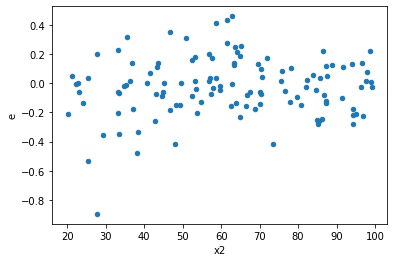

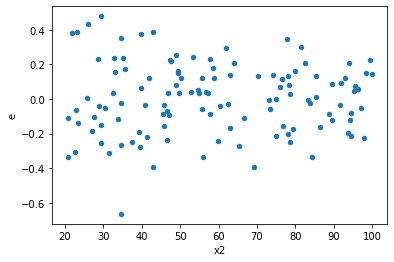

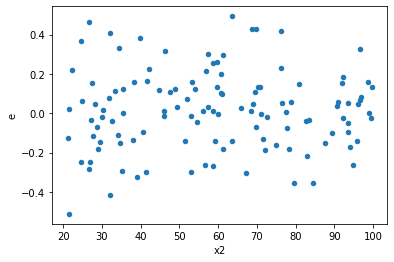

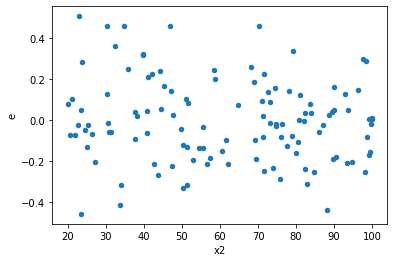

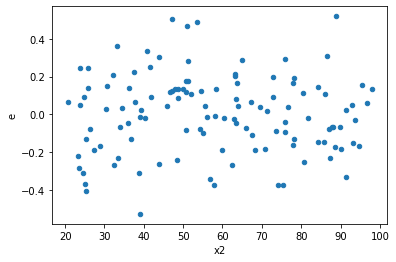

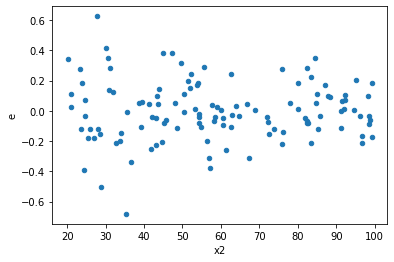

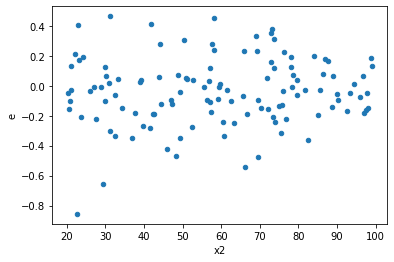

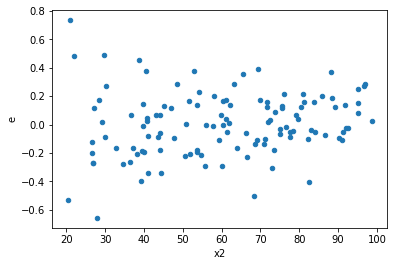

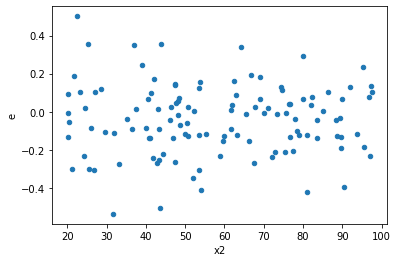

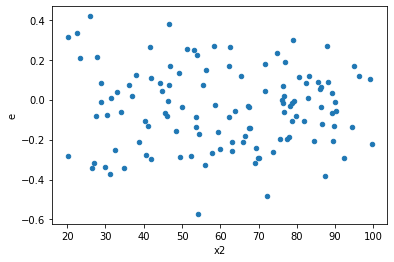

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
10.0,45.0,45.0,1.630277629439452,1.6873030012257901,0.03622839176532116,0.037495622249462006,1.0349789328863854,0.9087019473303828,0.5456490263348086,0.4543509736651914,Reject001=1 : Homoscedasticity
86.0,45.0,45.0,1.1834867834513272,1.3819909009666869,0.026299706298918382,0.03071090891037082,1.1677282081143945,0.6051916319543396,0.6974041840228302,0.3025958159771698,Reject001=1 : Homoscedasticity
320.0,45.0,45.0,1.7805551894463936,2.044110778652125,0.039567893098808746,0.04542468397004722,1.1480187700824231,0.6453396882763305,0.6773301558618348,0.32266984413816524,Reject001=1 : Homoscedasticity
341.0,45.0,45.0,1.5422552166085914,1.563687947693213,0.03427233814685759,0.03474862105984918,1.0138970067040862,0.9632827969532718,0.5183586015233641,0.4816413984766359,Reject001=1 : Homoscedasticity
363.0,45.0,45.0,1.6795462226948965,2.0998565537170206,0.037323249393219925,0.04666347897148935,1.250252315382973,0.45675211743128385,0.7716239412843581,0.22837605871564193,Reject001=1 : Homoscedasticity
368.0,45.0,45.0,1.9311834245436879,2.024607958787392,0.04291518721208195,0.04499128797305316,1.048376831043783,0.8747932369978813,0.5626033815010594,0.4373966184989406,Reject001=1 : Homoscedasticity
375.0,45.0,45.0,1.463817596619044,1.6974066160811165,0.03252927992486765,0.03772014702402481,1.159575223034338,0.6215799006378662,0.6892100496810669,0.3107899503189331,Reject001=1 : Homoscedasticity
491.0,45.0,45.0,2.0371736994701357,2.0422611332010603,0.0452705266548919,0.04538358073780134,1.0024972999269763,0.9933621460216258,0.5033189269891871,0.4966810730108129,Reject001=1 : Homoscedasticity
506.0,45.0,45.0,1.7175958367138855,1.848439326281325,0.03816879637141968,0.041076429472918334,1.0761782759195377,0.8065696865293672,0.5967151567353164,0.4032848432646836,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,2.261033103015386,0.8824356640508787,0.05024518006700857,0.01960968142335286,0.3902798516633986,0.0020457687850616354,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,2.7330667734801386,1.3180319916444152,0.060734817188447525,0.029289599814320336,0.4822538565225411,0.016105527231805555,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,2.24367504719761,1.4193746951154924,0.04985944549328022,0.03154165989145539,0.6326115258483249,0.12831657584504827,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,2.393951964514825,1.2424869708482404,0.05319893254477388,0.027610821574405343,0.5190108194589659,0.03012046204275616,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,1.9893914856638508,1.5372842127385276,0.044208699681418905,0.034161871394189504,0.7727409229488801,0.39047521839392435,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,2.7967296620897253,0.8641652845071467,0.06214954804643834,0.019203672989047703,0.3089913538019401,0.00013708482330143808,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,3.004741337305456,1.4304419184128125,0.06677202971789903,0.03178759818695139,0.47606158328942266,0.014355545444515288,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,3.5817094616514478,1.1417165175832173,0.0795935435922544,0.02537147816851594,0.3187630179966626,0.00020142526172354418,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,2.0547724122185196,1.1373849892022154,0.045661609160411544,0.025275221982271452,0.5535333170909137,0.05014586711609232,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      613
Reject001=0 : Heteroscedasticity    387
Name: Result_test, dtype: int64